<a href="https://colab.research.google.com/github/Laskiri/Machine-Inteligence/blob/main/Session3_Multiple_Linear_Regression_Vectorized_BikeSharing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Session 3: Kaggle Competition. Linear Regression with Multiple Variables [Vectorized]



# 1 Imports and Data Loading

In [2]:
import copy, math
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
np.set_printoptions(precision=2)  # reduced display precision on numpy arrays

In [3]:
def load_data():
  df = pd.read_csv("https://drive.google.com/uc?id=1kv9tIrH5Xwbd-Y-JqWw3KJZNKL2USAx0", sep=',')

  features = list(df)
  del features[0]
  del features[0]
  del features[len(features)-1]

  data = df.to_numpy()
  data = np.delete(data,1,axis=1)
  data = data.astype('float64')

  index = data[:,0]
  X = data[:,1:-1]
  y = data[:,-1]


  return X, y, features, index

# 2 Problem


## 2.1 Data Set


In [ ]:
# load the dataset
X_train, y_train, X_features, index = load_data()

Let's view the dataset and its features by plotting each feature versus bike demand.

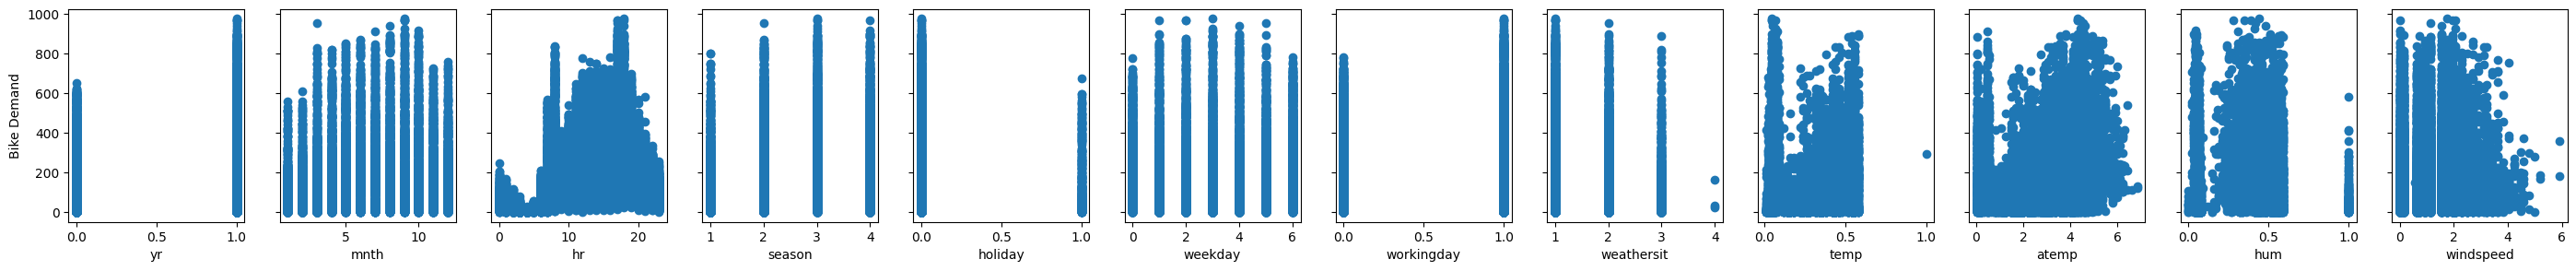

In [ ]:
fig,ax=plt.subplots(1, X_train.shape[1], figsize=(35, 3), sharey=True)
for i in range(len(ax)):
    ax[i].scatter(X_train[:,i],y_train)
    ax[i].set_xlabel(X_features[i])
ax[0].set_ylabel("Bike Demand")
plt.show()

## 2.2 Matrix X containing our examples
Similar to the table above, examples are stored in a NumPy matrix `X_train`. Each row of the matrix represents one example. When you have $m$ training examples ( $m$ is three in our example), and there are $n$ features (four in our example), $\mathbf{X}$ is a matrix with dimensions ($m$, $n$) (m rows, n columns).


$$\mathbf{X} =
\begin{pmatrix}
 x^{(0)}_0 & x^{(0)}_1 & \cdots & x^{(0)}_{n-1} \\
 x^{(1)}_0 & x^{(1)}_1 & \cdots & x^{(1)}_{n-1} \\
 \cdots \\
 x^{(m-1)}_0 & x^{(m-1)}_1 & \cdots & x^{(m-1)}_{n-1}
\end{pmatrix}
$$
notation:
- $\mathbf{x}^{(i)}$ is vector containing example i. $\mathbf{x}^{(i)}$ $ = (x^{(i)}_0, x^{(i)}_1, \cdots,x^{(i)}_{n-1})$
- $x^{(i)}_j$ is element j in example i. The superscript in parenthesis indicates the example number while the subscript represents an element.  

Display the input data.

In [ ]:
# data is stored in numpy array/matrix
print(f"X Shape: {X_train.shape}, X Type:{type(X_train)})")
print(f"y Shape: {y_train.shape}, y Type:{type(y_train)})")


X Shape: (10000, 12), X Type:<class 'numpy.ndarray'>)
y Shape: (10000,), y Type:<class 'numpy.ndarray'>)


<a name="toc_15456_2.2"></a>
## 2.3 Parameter vector w, b

* $\mathbf{w}$ is a vector with $n$ elements.
  - Each element contains the parameter associated with one feature.
  - in our dataset, n is 4.
  - notionally, we draw this as a column vector

$$\mathbf{w} = \begin{pmatrix}
w_0 \\
w_1 \\
\cdots\\
w_{n-1}
\end{pmatrix}
$$
* $b$ is a scalar parameter.  

In [ ]:
b_init = 1.0
w_init = np.ones(X_train.shape[1])
print(f"w_init shape: {w_init.shape}, b_init type: {type(b_init)}")

w_init shape: (12,), b_init type: <class 'float'>


<a name="toc_15456_3"></a>
# 3 Model Prediction With Multiple Variables
The model's prediction with multiple variables is given by the linear model:

$$ f_{\mathbf{w},b}(\mathbf{x}) =  w_0x_0 + w_1x_1 +... + w_{n-1}x_{n-1} + b \tag{1}$$
or in vector notation:
$$ f_{\mathbf{w},b}(\mathbf{x}) = \mathbf{w} \cdot \mathbf{x} + b  \tag{2} $$
where $\cdot$ is a vector `dot product`

To demonstrate the dot product, we will implement prediction using (1) and (2).

In [ ]:
def predict(x, w, b):
    """
    single predict using linear regression
    Args:
      x (ndarray): Shape (m,n) example with multiple features
      w (ndarray): Shape (n,) model parameters
      b (scalar):             model parameter

    Returns:
      p (scalar):  prediction
    """
    p = np.matmul(x, w) + b
    return p

In [ ]:
# Make predictions for the whole training data
f_wb = predict(X_train,w_init, b_init)
print(f"f_wb shape {f_wb.shape}, prediction for first row: {f_wb[0]}")

f_wb shape (10000,), prediction for first row: 36.623472222


<a name="toc_15456_4"></a>
# 4 Compute Cost With Multiple Variables
The equation for the cost function with multiple variables $J(\mathbf{w},b)$ is:
$$J(\mathbf{w},b) = \frac{1}{2m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - y^{(i)})^2 \tag{3}$$
where:
$$ f_{\mathbf{w},b}(\mathbf{x}^{(i)}) = \mathbf{w} \cdot \mathbf{x}^{(i)} + b  \tag{4} $$


In contrast to tje previous exercise, $\mathbf{w}$ and $\mathbf{x}^{(i)}$ are vectors rather than scalars supporting multiple features.

In [ ]:
def compute_cost(X, y, w, b):
    """
    compute cost
    Args:
      X (ndarray (m,n)): Data, m examples with n features
      y (ndarray (m,)) : target values
      w (ndarray (n,)) : model parameters
      b (scalar)       : model parameter

    Returns:
      cost (scalar): cost
    """

    return np.mean((predict(X,w,b)-y)**2)/2

In [ ]:
# Compute and display cost using our pre-chosen optimal parameters.
cost = compute_cost(X_train, y_train, w_init, b_init)
print(f'Cost at initial w,b: {cost}')

Cost at initial w,b: 28455.09583269068


<a name="toc_15456_5"></a>
# 5 Gradient Descent With Multiple Variables
Gradient descent for multiple variables:

$$\begin{align*} \text{repeat}&\text{ until convergence:} \; \lbrace \newline\;
& w_j = w_j -  \alpha \frac{\partial J(\mathbf{w},b)}{\partial w_j} \tag{5}  \; & \text{for j = 0..n-1}\newline
&b\ \ = b -  \alpha \frac{\partial J(\mathbf{w},b)}{\partial b}  \newline \rbrace
\end{align*}$$

where, n is the number of features, parameters $w_j$,  $b$, are updated simultaneously and where  

$$
\begin{align}
\frac{\partial J(\mathbf{w},b)}{\partial w_j}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - y^{(i)})x_{j}^{(i)} \tag{6}  \\
\frac{\partial J(\mathbf{w},b)}{\partial b}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - y^{(i)}) \tag{7}
\end{align}
$$
* m is the number of training examples in the data set

    
*  $f_{\mathbf{w},b}(\mathbf{x}^{(i)})$ is the model's prediction, while $y^{(i)}$ is the target value


In [ ]:
def compute_gradient(X, y, w, b):
    """
    Computes the gradient for linear regression
    Args:
      X (ndarray (m,n)): Data, m examples with n features
      y (ndarray (m,)) : target values
      w (ndarray (n,)) : model parameters
      b (scalar)       : model parameter

    Returns:
      dj_dw (ndarray (n,)): The gradient of the cost w.r.t. the parameters w.
      dj_db (scalar):       The gradient of the cost w.r.t. the parameter b.
    """

    error = predict(X,w,b)-y
    dj_db = np.mean(error,axis=0)
    dj_dw = np.mean(np.expand_dims(error,axis=1)*X,axis=0)
    return dj_db, dj_dw


In [ ]:
#Compute and display gradient
tmp_dj_db, tmp_dj_dw = compute_gradient(X_train, y_train, w_init, b_init)
print(f'dj_db at initial w,b: {tmp_dj_db}')
print(f'dj_dw at initial w,b: \n {tmp_dj_dw}')

dj_db at initial w,b: -158.1218732638952
dj_dw at initial w,b: 
 [ -101.77 -1100.16 -2268.49  -428.05    -3.63  -482.33  -109.8   -209.11
   -30.34  -542.51   -41.77  -201.98]


In [ ]:
def gradient_descent(X, y, w_in, b_in, cost_function, gradient_function, alpha, num_iters):
    """
    Performs batch gradient descent to learn theta. Updates theta by taking
    num_iters gradient steps with learning rate alpha

    Args:
      X (ndarray (m,n))   : Data, m examples with n features
      y (ndarray (m,))    : target values
      w_in (ndarray (n,)) : initial model parameters
      b_in (scalar)       : initial model parameter
      cost_function       : function to compute cost
      gradient_function   : function to compute the gradient
      alpha (float)       : Learning rate
      num_iters (int)     : number of iterations to run gradient descent

    Returns:
      w (ndarray (n,)) : Updated values of parameters
      b (scalar)       : Updated value of parameter
      """

    # An array to store cost J and w's at each iteration primarily for graphing later
    J_history = []
    w = copy.deepcopy(w_in)  #avoid modifying global w within function
    b = b_in

    for i in range(num_iters):

        # Calculate the gradient and update the parameters
        dj_db,dj_dw = gradient_function(X, y, w, b)   ##None

        # Update Parameters using w, b, alpha and gradient
        w = w - alpha * dj_dw               ##None
        b = b - alpha * dj_db               ##None

        # Save cost J at each iteration
        if i<100000:      # prevent resource exhaustion
            J_history.append( cost_function(X, y, w, b))

        # Print cost every at intervals 10 times or as many iterations if < 10
        if i% math.ceil(num_iters/20) == 0:
            print(f"Iteration {i:4d}: Cost {J_history[-1]:8.2f}   ")

    return w, b, J_history #return final w,b and J history for graphing

# 6 Feature Scaling

## 6.1 Z-score normalization

After z-score normalization, all features will have a mean of 0 and a standard deviation of 1.

To implement z-score normalization, adjust your input values as shown in this formula:
$$x^{(i)}_j = \dfrac{x^{(i)}_j - \mu_j}{\sigma_j} \tag{4}$$
where $j$ selects a feature or a column in the $\mathbf{X}$ matrix. $µ_j$ is the mean of all the values for feature (j) and $\sigma_j$ is the standard deviation of feature (j).
$$
\begin{align}
\mu_j &= \frac{1}{m} \sum_{i=0}^{m-1} x^{(i)}_j \tag{5}\\
\sigma^2_j &= \frac{1}{m} \sum_{i=0}^{m-1} (x^{(i)}_j - \mu_j)^2  \tag{6}
\end{align}
$$

>**Implementation Note:** When normalizing the features, it is important
to store the values used for normalization - the mean value and the standard deviation used for the computations. After learning the parameters
from the model, we often want to predict the prices of houses we have not
seen before. Given a new x value (living room area and number of bed-
rooms), we must first normalize x using the mean and standard deviation
that we had previously computed from the training set.

**Implementation**

In [ ]:
def zscore_normalize_features(X):
    """
    computes  X, zcore normalized by column

    Args:
      X (ndarray (m,n))     : input data, m examples, n features

    Returns:
      X_norm (ndarray (m,n)): input normalized by column
      mu (ndarray (n,))     : mean of each feature
      sigma (ndarray (n,))  : standard deviation of each feature
    """
    # find the mean of each column/feature
    X_mean     = np.mean(X, axis=0)                 # mu will have shape (n,)
    # find the standard deviation of each column/feature
    X_sigma  = np.std(X, axis=0)                  # sigma will have shape (n,)
    # element-wise, subtract mu for that column from each example, divide by std for that column
    X_norm = (X - X_mean) / X_sigma

    return (X_norm, X_mean, X_sigma)

#check our work
#from sklearn.preprocessing import scale
#scale(X_orig, axis=0, with_mean=True, with_std=True, copy=True)

Apply data normalization

In [ ]:
X_norm, X_mean, X_sigma = zscore_normalize_features(X_train)

Plotting the data after normalization (compare with the output of Section 2.1)

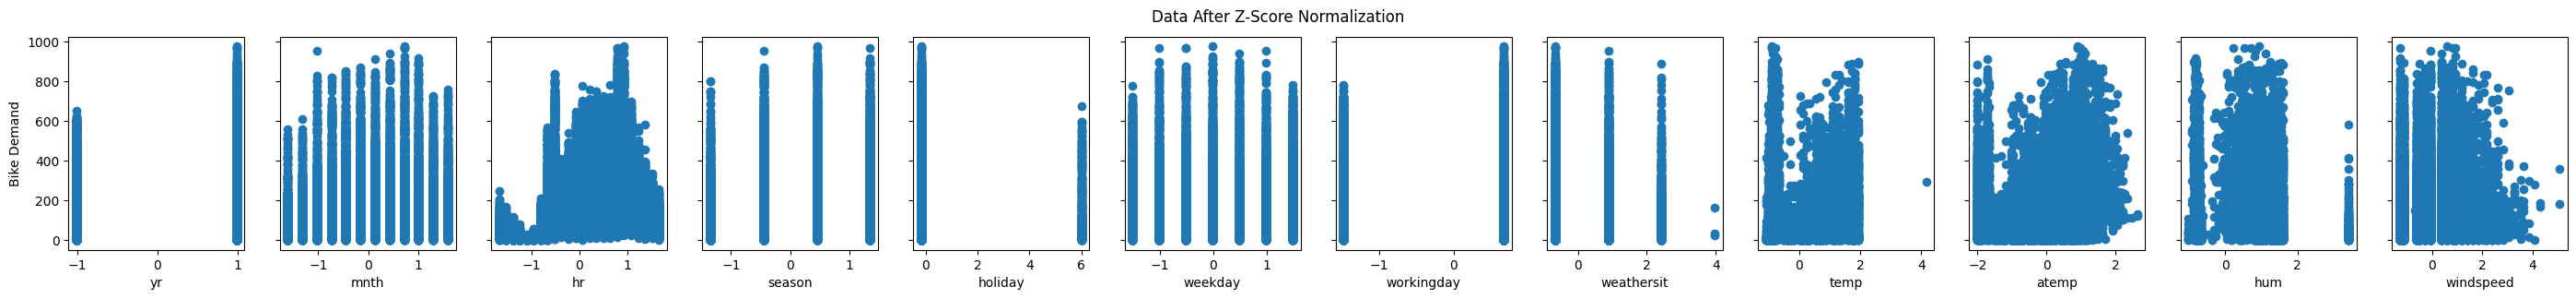

In [ ]:
fig,ax=plt.subplots(1, X_norm.shape[1], figsize=(35, 3), sharey=True)
for i in range(len(ax)):
    ax[i].scatter(X_norm[:,i],y_train)
    ax[i].set_xlabel(X_features[i])

ax[0].set_ylabel("Bike Demand")
fig.suptitle("Data After Z-Score Normalization")
plt.show()

## 6.2 Runing Gradient Descent after Feature Scaling

In [ ]:
# initialize parameters
initial_w = np.zeros_like(w_init)
initial_b = 0.
# some gradient descent settings
iterations = 10000
alpha = 0.001
# run gradient descent
w_final, b_final, J_hist = gradient_descent(X_norm, y_train, initial_w, initial_b,
                                                    compute_cost, compute_gradient,
                                                    alpha, iterations)
print(f"b,w found by gradient descent: {b_final:0.2f},{w_final} ")
m,_ = X_train.shape
for i in range(5):
    print(f"prediction: {np.dot(X_norm[i], w_final) + b_final:0.2f}, target value: {y_train[i]}")

Iteration    0: Cost 34631.75   
Iteration  500: Cost 19553.55   
Iteration 1000: Cost 14318.25   
Iteration 1500: Cost 12455.10   
Iteration 2000: Cost 11780.81   
Iteration 2500: Cost 11532.89   
Iteration 3000: Cost 11439.73   
Iteration 3500: Cost 11403.36   
Iteration 4000: Cost 11388.13   
Iteration 4500: Cost 11380.96   
Iteration 5000: Cost 11376.99   
Iteration 5500: Cost 11374.41   
Iteration 6000: Cost 11372.51   
Iteration 6500: Cost 11371.02   
Iteration 7000: Cost 11369.79   
Iteration 7500: Cost 11368.76   
Iteration 8000: Cost 11367.90   
Iteration 8500: Cost 11367.17   
Iteration 9000: Cost 11366.55   
Iteration 9500: Cost 11366.03   
b,w found by gradient descent: 190.00,[ 44.05  -3.71  64.88  31.19  -2.25   5.08   2.4  -19.25  -7.73  34.21
  14.46  11.45] 
prediction: 94.19, target value: 70.0
prediction: 263.66, target value: 239.0
prediction: 331.58, target value: 93.0
prediction: 301.41, target value: 463.0
prediction: 77.79, target value: 198.0


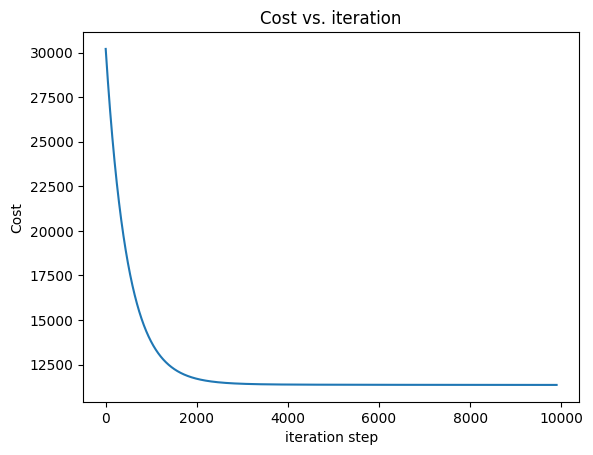

In [ ]:
# plot cost versus iteration
plt.plot(J_hist[100:])
plt.title("Cost vs. iteration")
plt.ylabel('Cost')
plt.xlabel('iteration step')
plt.show()

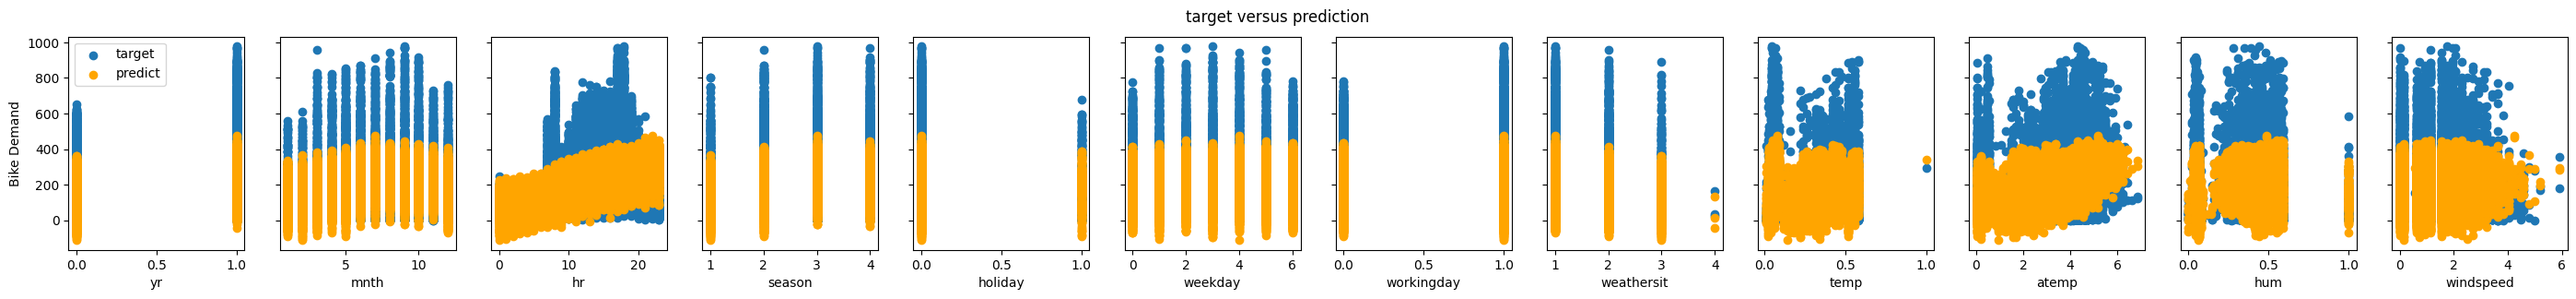

In [ ]:
#predict target using normalized features
m = X_norm.shape[0]
yp = np.zeros(m)
for i in range(m):
    yp[i] = np.dot(X_norm[i], w_final) + b_final

    # plot predictions and targets versus original features
fig,ax=plt.subplots(1, X_train.shape[1], figsize=(35, 3), sharey=True)
for i in range(len(ax)):
    ax[i].scatter(X_train[:,i],y_train, label = 'target')
    ax[i].set_xlabel(X_features[i])
    ax[i].scatter(X_train[:,i],yp,color="orange", label = 'predict')
ax[0].set_ylabel("Bike Demand"); ax[0].legend();
fig.suptitle("target versus prediction")
plt.show()

# 7 Feature Engineering [Adapt this part for the Bike Sharing Data Set]

Let us transform the month feature to 12 new features: X_Month_January, X_Month_February, ...., X_Month_December

In [ ]:
import copy

def add_new_features(X_set, X_features):
  # Create a larger matrix
  X_extended = np.zeros((X_set.shape[0],X_set.shape[1]+12))

  # Copy the training data to the new matrix
  X_extended[:,:X_set.shape[1]] = X_set

  X_features_extended = copy.deepcopy(X_features)

  for i in range(12):
    X_extended[:,X_set.shape[1]+i]=(X_set[:,1]==(i+1))
    X_features_extended.append("X_Month_"+str(i+1))

  return X_extended, X_features_extended

Let us look how the new data set looks like:

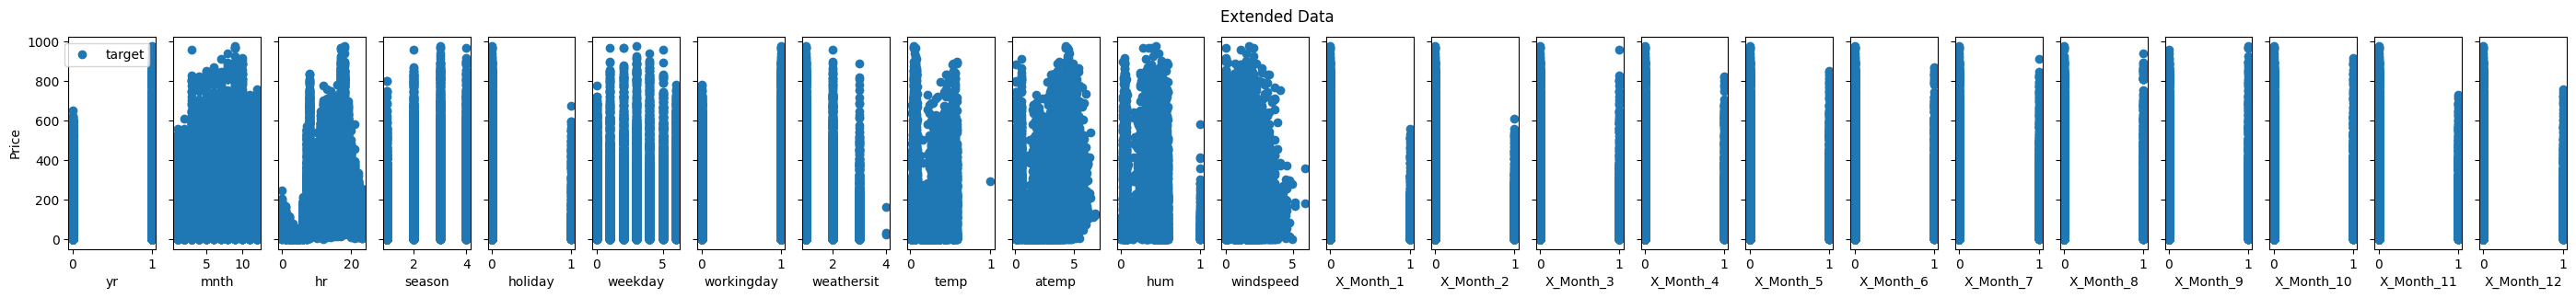

In [ ]:
X_train_extended, X_features_extended = add_new_features(X_train, X_features)

#predict target using new features
m = X_train_extended.shape[0]

# plot predictions and targets versus original features
fig,ax=plt.subplots(1, X_train_extended.shape[1], figsize=(35, 3), sharey=True)
for i in range(len(ax)):
    ax[i].scatter(X_train_extended[:,i],y_train, label = 'target')
    ax[i].set_xlabel(X_features_extended[i])
ax[0].set_ylabel("Price"); ax[0].legend();
fig.suptitle("Extended Data")
plt.show()

Let us normalize the new data set

In [ ]:
X_norm, X_mean, X_sigma = zscore_normalize_features(X_train_extended)

Let us learn with the new data set

In [ ]:
# initialize parameters
initial_w = np.zeros(X_norm.shape[1])
initial_b = 0.
# some gradient descent settings
iterations = 10000
alpha = 0.01
# run gradient descent
w_final, b_final, J_hist = gradient_descent(X_norm, y_train, initial_w, initial_b,
                                                    compute_cost, compute_gradient,
                                                    alpha, iterations)
print(f"b,w found by gradient descent: {b_final:0.2f},{w_final} ")
m,_ = X_train.shape
for i in range(3):
    print(f"prediction: {np.dot(X_norm[i], w_final) + b_final:0.2f}, target value: {y_train[i]}")

Iteration    0: Cost 34163.04   
Iteration  500: Cost 11052.16   
Iteration 1000: Cost 11041.44   
Iteration 1500: Cost 11038.91   
Iteration 2000: Cost 11038.20   
Iteration 2500: Cost 11038.00   
Iteration 3000: Cost 11037.94   
Iteration 3500: Cost 11037.92   
Iteration 4000: Cost 11037.92   
Iteration 4500: Cost 11037.92   
Iteration 5000: Cost 11037.92   
Iteration 5500: Cost 11037.92   
Iteration 6000: Cost 11037.92   
Iteration 6500: Cost 11037.92   
Iteration 7000: Cost 11037.92   
Iteration 7500: Cost 11037.92   
Iteration 8000: Cost 11037.92   
Iteration 8500: Cost 11037.92   
Iteration 9000: Cost 11037.92   
Iteration 9500: Cost 11037.92   
b,w found by gradient descent: 190.01,[ 4.51e+01 -1.71e+00  6.63e+01  3.33e+01 -1.30e+00  4.95e+00  2.52e+00
 -1.88e+01 -8.17e+00  1.93e+01  1.65e+01  1.20e+01 -1.22e+01 -6.77e+00
  9.38e-01  3.01e+00  1.37e+01  1.08e+01  2.99e-01  3.97e+00  6.92e+00
  1.48e-04 -1.20e+01 -9.00e+00] 
prediction: 125.89, target value: 70.0
prediction: 260.0

Let us inspect the learning results of the new data set

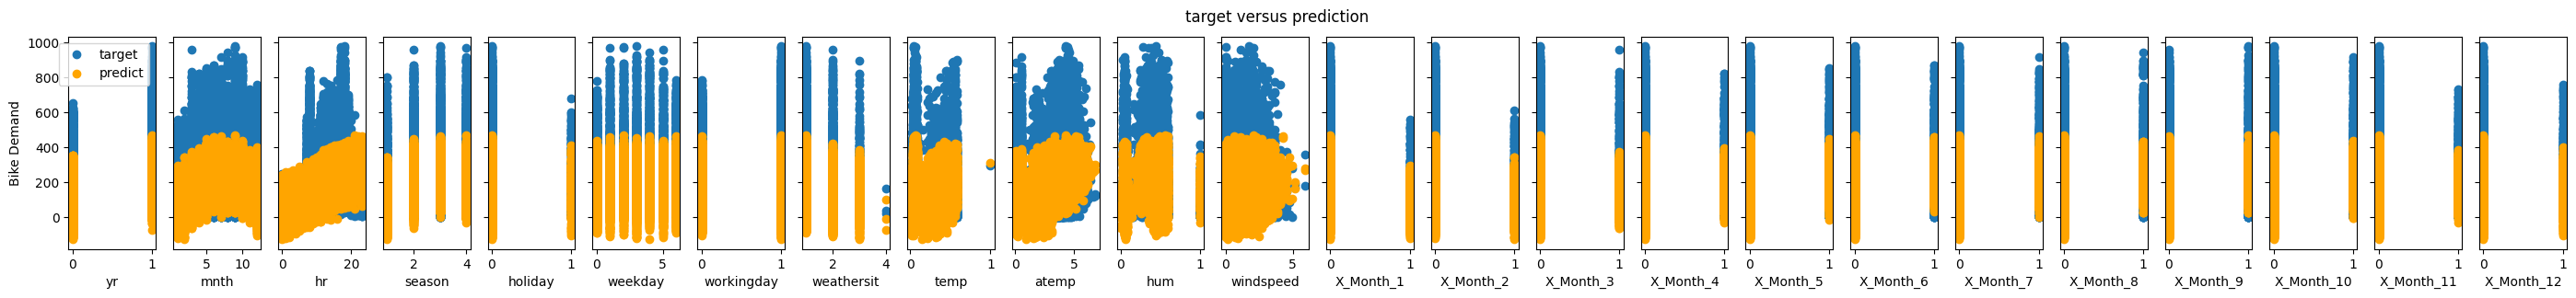

In [ ]:
#predict target using normalized features
m = X_norm.shape[0]
yp = np.zeros(m)
for i in range(m):
    yp[i] = np.dot(X_norm[i], w_final) + b_final

    # plot predictions and targets versus original features
fig,ax=plt.subplots(1, X_train_extended.shape[1], figsize=(35, 3), sharey=True)
for i in range(len(ax)):
    ax[i].scatter(X_train_extended[:,i],y_train, label = 'target')
    ax[i].set_xlabel(X_features_extended[i])
    ax[i].scatter(X_train_extended[:,i],yp,color="orange", label = 'predict')
ax[0].set_ylabel("Bike Demand"); ax[0].legend();
fig.suptitle("target versus prediction")
plt.show()

# 8 Overfitting



## 8.1 Adding Polynomial Features


Add polynomial features: temp^2, temp^3, etc.

In [ ]:
def add_new_polynomial_features(X_set, X_features):
  # Enter the degree of the new polynomial features.
  degree = 5
  # Create a larger matrix
  X_set_extended = np.zeros((X_set.shape[0],X_set.shape[1]+degree-1))

  # Copy the training data to the new matrix
  if  degree>1:
    X_set_extended[:,:-(degree-1)] = X_set
  else:
    X_set_extended = X_set

  X_features_extended = copy.deepcopy(X_features)

  for d in range(2,degree+1):
    #Add the new colum for "temp^d"
    X_set_extended[:,X_set.shape[1] + d-2] = X_set[:,8]**d
    #Create new names for the variable
    X_features_extended.append("temp^"+str(d))

  return X_set_extended, X_features_extended

In [ ]:
X_train_extended_poly, X_features_extended_poly = add_new_polynomial_features(X_train_extended, X_features_extended)
X_train_extended_poly, X_mean, X_sigma = zscore_normalize_features(X_train_extended_poly)

Learn the model

In [ ]:
# initialize parameters
initial_w = np.zeros(X_train_extended_poly.shape[1])
initial_b = 0.
# some gradient descent settings
iterations = 10000
alpha = 0.01
# run gradient descent
w_final, b_final, J_hist = gradient_descent(X_train_extended_poly, y_train, initial_w, initial_b,
                                                    compute_cost, compute_gradient,
                                                    alpha, iterations)
print(f"b,w found by gradient descent: {b_final:0.2f},{w_final} ")
m,_ = X_train.shape
for i in range(3):
    print(f"prediction: {np.dot(X_train_extended_poly[i], w_final) + b_final:0.2f}, target value: {y_train[i]}")

Iteration    0: Cost 34161.62   
Iteration  500: Cost 11027.97   
Iteration 1000: Cost 11011.51   
Iteration 1500: Cost 11004.80   
Iteration 2000: Cost 11000.83   
Iteration 2500: Cost 10998.04   
Iteration 3000: Cost 10995.90   
Iteration 3500: Cost 10994.22   
Iteration 4000: Cost 10992.86   
Iteration 4500: Cost 10991.77   
Iteration 5000: Cost 10990.87   
Iteration 5500: Cost 10990.14   
Iteration 6000: Cost 10989.54   
Iteration 6500: Cost 10989.04   
Iteration 7000: Cost 10988.62   
Iteration 7500: Cost 10988.26   
Iteration 8000: Cost 10987.96   
Iteration 8500: Cost 10987.70   
Iteration 9000: Cost 10987.47   
Iteration 9500: Cost 10987.26   
b,w found by gradient descent: 190.01,[ 44.92  -1.92  65.96  33.2   -1.18   5.25   2.12 -18.88 -34.07  18.08
  16.52  11.78 -10.94  -4.97   1.9    3.02  11.69   9.29  -0.61   2.85
   5.03  -0.87 -10.28  -6.47  -6.54  26.83  23.67 -18.44] 
prediction: 134.48, target value: 70.0
prediction: 260.69, target value: 239.0
prediction: 343.53, ta

## 8.2 Measuring Overfitting

We now split the data set in training data set and validation data set.  

In [ ]:
#Permutate the data
np.random.seed(123)
perm = np.random.permutation(X_train_extended_poly.shape[0])
X_train_extended_poly = X_train_extended_poly[perm,:]
y_train = y_train[perm]
index = index[perm]

#Split the data
size_train = 66
X_split_train, y_split_train = X_train_extended_poly[0:size_train,:], y_train[0:size_train]
X_split_val, y_split_val = X_train_extended_poly[size_train:,:], y_train[size_train:]

Let us plot both data sets

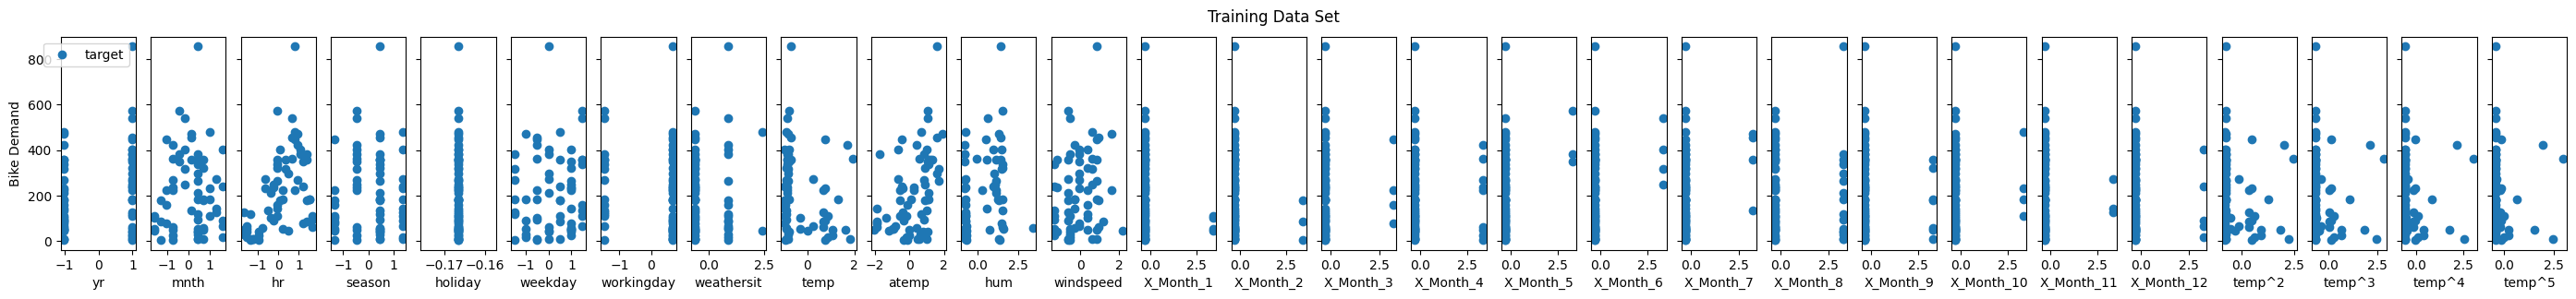

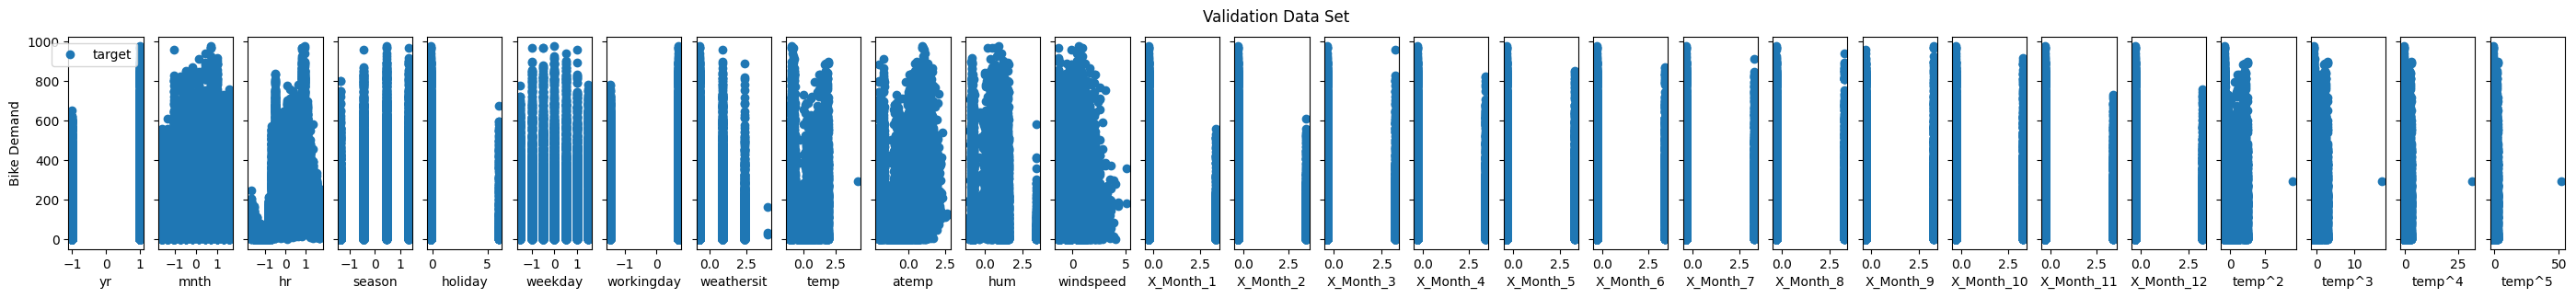

In [ ]:
# plot the training data set
fig,ax=plt.subplots(1, X_train_extended_poly.shape[1], figsize=(35, 3), sharey=True)
for i in range(len(ax)):
    ax[i].scatter(X_split_train[:,i],y_split_train, label = 'target')
    ax[i].set_xlabel(X_features_extended_poly[i])
ax[0].set_ylabel("Bike Demand"); ax[0].legend();
fig.suptitle("Training Data Set")
plt.show()


# plot predictions and targets versus original features
fig,ax=plt.subplots(1, X_train_extended_poly.shape[1], figsize=(35, 3), sharey=True)
for i in range(len(ax)):
    ax[i].scatter(X_split_val[:,i],y_split_val, label = 'target')
    ax[i].set_xlabel(X_features_extended_poly[i])
ax[0].set_ylabel("Bike Demand"); ax[0].legend();
fig.suptitle("Validation Data Set")
plt.show()



The function below implements gradient descent, but it computes both the cost for the training data set and for the validation data set

In [ ]:
def gradient_descent_val(X, y, X_val, y_val, w_in, b_in, cost_function, gradient_function, alpha, num_iters):
    """
    Performs batch gradient descent to learn theta. Updates theta by taking
    num_iters gradient steps with learning rate alpha

    Args:
      X (ndarray (m,n))   : Data, m examples with n features
      y (ndarray (m,))    : target values
      w_in (ndarray (n,)) : initial model parameters
      b_in (scalar)       : initial model parameter
      cost_function       : function to compute cost
      gradient_function   : function to compute the gradient
      alpha (float)       : Learning rate
      num_iters (int)     : number of iterations to run gradient descent

    Returns:
      w (ndarray (n,)) : Updated values of parameters
      b (scalar)       : Updated value of parameter
      """

    # An array to store cost J and w's at each iteration primarily for graphing later
    J_history_train = []
    J_history_test = []
    w = copy.deepcopy(w_in)  #avoid modifying global w within function
    b = b_in

    for i in range(num_iters):

        # Calculate the gradient and update the parameters
        dj_db,dj_dw = gradient_function(X, y, w, b)   ##None

        # Update Parameters using w, b, alpha and gradient
        w = w - alpha * dj_dw               ##None
        b = b - alpha * dj_db               ##None

        # Save cost J at each iteration
        if i<100000:      # prevent resource exhaustion
            J_history_train.append( cost_function(X, y, w, b))
            J_history_test.append( cost_function(X_val, y_val, w, b))

        # Print cost every at intervals 10 times or as many iterations if < 10
        if i% math.ceil(num_iters / 10) == 0:
            print(f"Iteration {i:4d}: Training Cost {J_history_train[-1]:8.2f}, Test cost {J_history_test[-1]:8.2f}   ")

    return w, b, J_history_train, J_history_test

##  8.3 Measuing Training and Validation Cost

In [ ]:
# initialize parameters
initial_w = np.zeros(X_split_train.shape[1])
initial_b = 0.
# some gradient descent settings
iterations = 10000
alpha = 0.01
# run gradient descent
w_final, b_final, J_hist_train, J_history_test = gradient_descent_val(X_split_train, y_split_train, X_split_val, y_split_val, initial_w, initial_b,
                                                    compute_cost, compute_gradient,
                                                    alpha, iterations)
print(f"b,w found by gradient descent: {b_final:0.2f},{w_final} ")
m,_ = X_train.shape
for i in range(3):
    print(f"prediction: {np.dot(X_split_train[i], w_final) + b_final:0.2f}, target value: {y_train[i]}")

Iteration    0: Training Cost 36415.84, Test cost 33984.36   
Iteration 1000: Training Cost  5514.59, Test cost 16645.38   
Iteration 2000: Training Cost  5506.96, Test cost 16828.80   
Iteration 3000: Training Cost  5503.87, Test cost 16831.89   
Iteration 4000: Training Cost  5501.03, Test cost 16831.29   
Iteration 5000: Training Cost  5498.28, Test cost 16832.56   
Iteration 6000: Training Cost  5495.62, Test cost 16835.27   
Iteration 7000: Training Cost  5493.03, Test cost 16839.06   
Iteration 8000: Training Cost  5490.52, Test cost 16843.75   
Iteration 9000: Training Cost  5488.08, Test cost 16849.24   
b,w found by gradient descent: 200.76,[ 32.32  12.65  74.77   1.95 -33.44  35.    -3.35  32.    15.37  69.28
  18.42  40.15 -11.87 -24.12   5.02   1.31  23.22   7.85   6.36 -12.65
 -24.41  -2.27  36.29  -4.97 -38.07 -12.15  18.12  33.84] 
prediction: 60.35, target value: 15.0
prediction: 415.47, target value: 383.0
prediction: -30.38, target value: 48.0


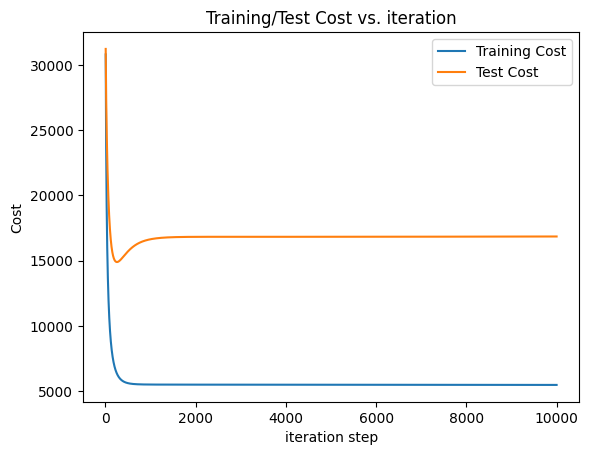

In [ ]:
# plot cost versus iteration
plt.plot(np.arange(5,iterations,1), J_hist_train[5:], label = "Training Cost")
plt.plot(np.arange(5,iterations,1), J_history_test[5:], label = "Test Cost")
plt.title("Training/Test Cost vs. iteration")
plt.ylabel('Cost')
plt.xlabel('iteration step')
plt.legend()
plt.show()

# 9 Preparing Submission

In [ ]:
def load_test_data():
  df = pd.read_csv("https://drive.google.com/uc?id=1kwhT1_4Cr4sqdQhdJQWa5Hp7ceS4QxYV", sep=',')

  data = df.to_numpy()
  data = np.delete(data,1,axis=1)
  data = data.astype('float64')

  index = data[:,0]
  X = data[:,1:]

  return X, index

Using the final model make the predictions

In [ ]:
#Load
X_test, index_text = load_test_data()

#Add Engineered Features
X_test_extended, _ = add_new_features(X_test, [])

#Add Polynomial Features
X_test_extended_poly, _ = add_new_polynomial_features(X_test_extended, [])

#Normalize using same X_men and X_sigma than in training
X_test_extended_poly = (X_test_extended_poly - X_mean) / X_sigma

#Compute predicitons according to final model
predictions = predict(X_test_extended_poly, w_final, b_final)


#Combine predicitons and index to creart "Sample_solution.csv" file
final_solution = np.transpose(np.asarray([index_text, predictions]))

final_solution[:,0] = final_solution[:,0].astype('int32')

#Create data frame
df = pd.DataFrame(final_solution, columns=["Id", "Expected"])

#Convert data type.
convert_dict = {'Id': int,
                'Expected': float
                }

df = df.astype(convert_dict)

#Create the CSV file. It will appear on the local files of the google colab. Click on the "folder" icon at your left. And download the file.
df.to_csv("solution_file.csv",index=False)

# This will also download the file. Be careful, it might place it in your download folder but as a hidden file and with a different name. I could not find how to fix it.
from google.colab import files
files.download('solution_file.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>